#### Variables

| Variable Name  | Variable Label                           | Variable Scale                                       |
| -------------- | --------------------------------------- | ---------------------------------------------------- |
| id             | Participants ID number                   | string                                               |
| age            | Age of participants                      | numeric                                              |
| year           | Curriculum Year of participants          | 1 = Biomed1, 2 = Biomed2, 3 = Biomed3, 4 = Mmed1, 5 = Mmed2, 6 = Mmed3 |
| sex            | Gender of the participants               | 1 = Man, 2 = Woman, 3 = Non-binary                  |
| glang          | Mother Tongue                            | 1 = French, 15 = German, 20 = English, 37 = Arab, 51 = Basque, 52 = Bulgarian, 53 = Catalan, 54 = Chinese, 59 = Korean, 60 = Croatian, 62 = Danish, 63 = Spanish, 82 = Estonian, 83 = Finnish, 84 = Galician, 85 = Greek, 86 = Hebrew, 87 = Hindi, 88 = Hungarian, 89 = Indonesian, 90 = Italian, 92 = Japanese, 93 = Kazakh, 94 = Latvian, 95 = Lithuanian, 96 = Malay, 98 = Dutch, 100 = Norwegian, 101 = Polish, 102 = Portuguese, 104 = Romanian, 106 = Russian, 108 = Serbian, 112 = Slovak, 113 = Slovenian, 114 = Swedish, 116 = Czech, 117 = Thai, 118 = Turkish, 119 = Ukrainian, 120 = Vietnamese, 121 = Other |
| part           | Partnership Status                       | 0 = No, 1 = Yes                                      |
| job            | Having a job - if participants have a paid job | 0 = No, 1 = Yes                               |
| stud_h         | Average hours of study per week           | numeric                                              |
| health         | Satisfaction with health                  | 1 = Very dissatisfied, 2 = Dissatisfied, 3 = Neither satisfied nor dissatisfied, 4 = Satisfied, 5 = Very satisfied |
| psyt           | Consulted with psychotherapy last year   |                                                      |
| jspe           | JSPE total empathy score                 | numeric                                              |
| qcae_cog       | QCAE Cognitive empathy score              | numeric                                              |
| qcae_aff       | QCAE Affective empathy score              | numeric                                              |
| asmp           | AMSP total score                         | numeric                                              |
| erec_mean      | GERT: mean value of correct responses     | numeric                                              |
| cesd           | CES-D total score                        | numeric                                              |
| stai_t         | STAI score                               | numeric                                              |
| mbi_ex         | MBI Emotional Exhaustion                 | numeric                                              |
| mbi_cy         | MBI Cynicism                             | numeric                                              |
| mbi_ea         | MBI Academic Efficacy                    | numeric                                              

#### Understanding the meaning of the indicators

* jpse (Jefferson Scale of Physician Empathy) = cognitive ability to understand patient's pain, suffering, and perspective combined with an ability to communicate this understanding and an intention to help. A higher score corresponds to a higher degree of empathy and vice versa
* qcae_cog (Questionnaire of Cognitive and Affective Empathy) = measuring cognitive and affective empathy. A higher score means a person is more emphatetic and better at understanding and sharing emotions.
* amsp (Abbreviated Mental Test Score) = A higher score indicates better cognitive functioning or a higher level of mental clarity
* erec_mean (GERT: Mean Value of Correct Responses) = A higher score shows better performance on a cognitive task
* cesd CESD (Center for Epidemiologic Studies Depression Scale) = A higher score indicates higher level of self-reported depression
* stai_t (TAI-T (State-Trait Anxiety Inventory - Trait) = A higher score shows a higher level of trait anxiety
* mbi_ex  = Higher scores on Emotional Exhaustion and Cynicism typically indicate higher levels of burnout
* mbi_cy = Higher scores on Emotional Exhaustion and Cynicism typically indicate higher levels of burnout
* mbi_ea = A higher score indicates a more positive view of one's effectiveness in academic or work-related tasks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv')

In [2]:
#Check for missing values
df.isna().sum()

id           0
age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [3]:
#Check for duplicated values
df.duplicated().sum()

0

In [4]:
#Column id is irrelevant for analysis
df2 = df.drop(labels='id', axis=1)

# Identifying Outliers

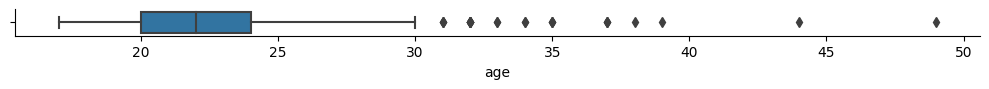

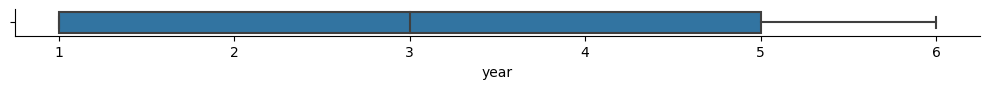

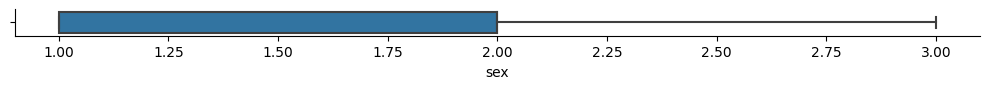

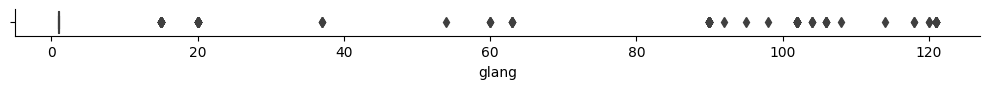

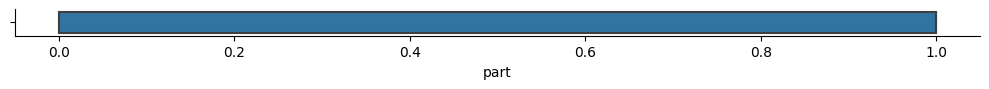

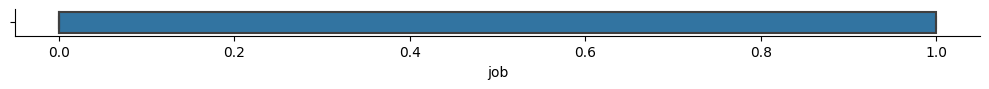

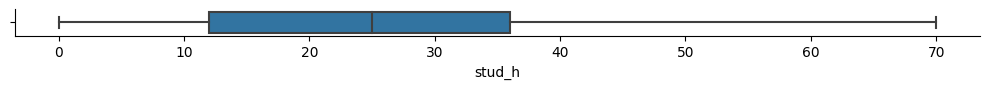

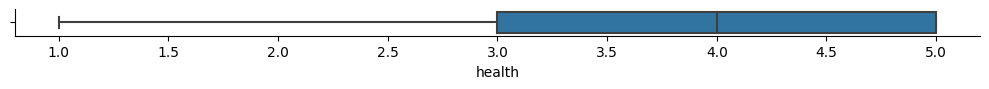

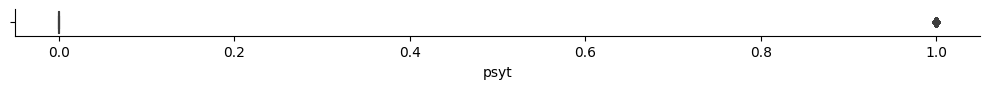

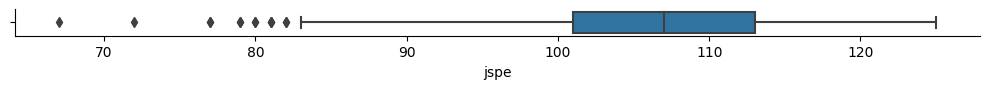

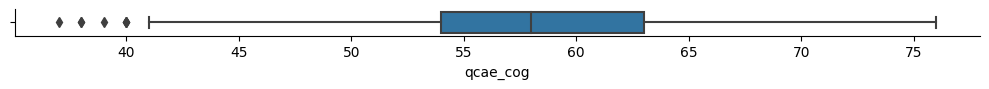

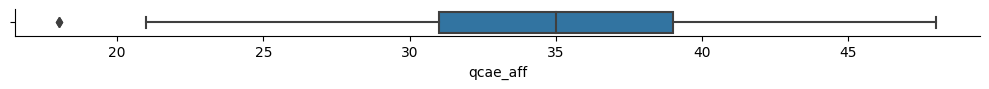

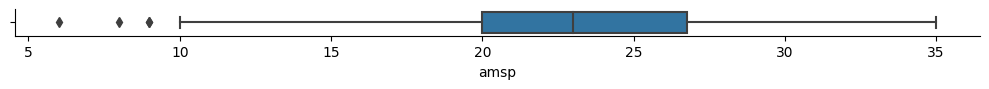

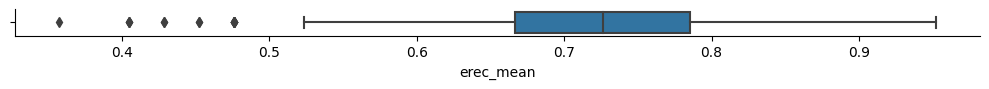

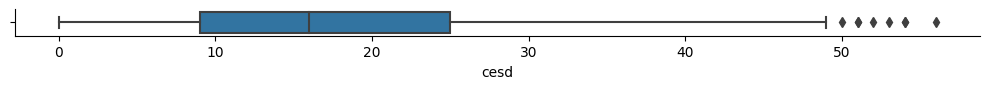

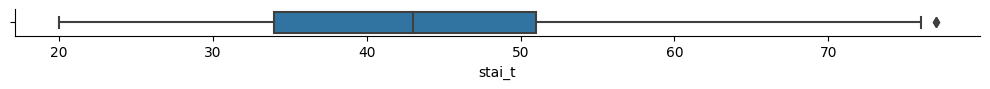

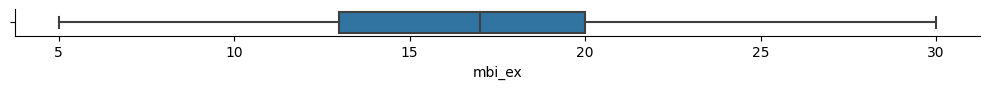

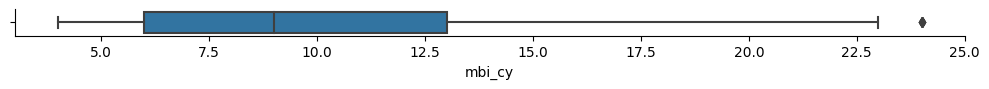

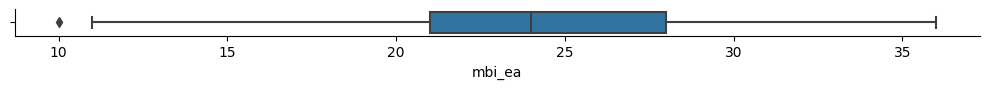

In [5]:
for col in df2.columns:
    sns.catplot(x=col, data=df2, kind='box', height = 1.0, aspect=10)
    plt.tight_layout()

In [6]:
def detectoutlier(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outlier = data[(data[col] < lower_bound)| (data[col] > upper_bound)]
        num_outliers = len(outlier[outlier.notna()]) #get the number of outliers
        outlier_data = outlier[outlier.notna()][col] #outlier[outlier.notna()] filters the non-null values and access the data in the column
        unique_values = list(outlier_data.unique())
        if num_outliers != 0:
            print(f'{col} contains {num_outliers} outliers')
            print(f"{col} contains a list of these unique outlier values:")
            print(unique_values)

In [7]:
detectoutlier(df2)

age contains 24 outliers
age contains a list of these unique outlier values:
[32, 37, 31, 35, 33, 49, 44, 34, 39, 38]
glang contains 169 outliers
glang contains a list of these unique outlier values:
[120, 90, 102, 15, 20, 106, 121, 118, 63, 108, 37, 104, 114, 54, 60, 98, 92, 95]
psyt contains 199 outliers
psyt contains a list of these unique outlier values:
[1]
jspe contains 13 outliers
jspe contains a list of these unique outlier values:
[77, 72, 82, 79, 81, 80, 67]
qcae_cog contains 7 outliers
qcae_cog contains a list of these unique outlier values:
[40, 38, 39, 37]
qcae_aff contains 2 outliers
qcae_aff contains a list of these unique outlier values:
[18]
amsp contains 4 outliers
amsp contains a list of these unique outlier values:
[6, 8, 9]
erec_mean contains 15 outliers
erec_mean contains a list of these unique outlier values:
[0.42857143, 0.45238096, 0.47619048, 0.40476191, 0.35714287]
cesd contains 8 outliers
cesd contains a list of these unique outlier values:
[54, 52, 50, 51, 

From this observation of the outliers:
We do not remove the age outliers as our studies do not limit the age of participants
It is normal for the language column - glang to have outliers and odd values
Upon inspection, psyt contains 199 outliers but this is a binary question, hence it is expected to have such outliers
We were to remove outliers from the results of the survey, which is jspe, qcae_cog, qcae_aff, amsp, erec_mean, cesd, stai_t, mbi_cy and mbi_ea as people may have responded the survey incorrectly, leading to extreme values


Since we are planning to conduct multiple linear regression for these studies, some of the basic assumptions to multiple linear regression include whether the data follows a normal distribution. We will inspect the distribution of the data below

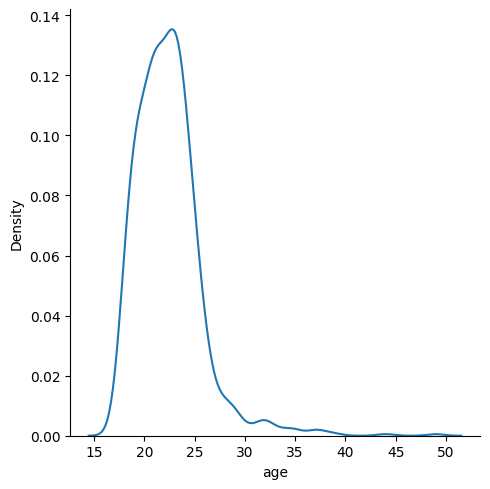

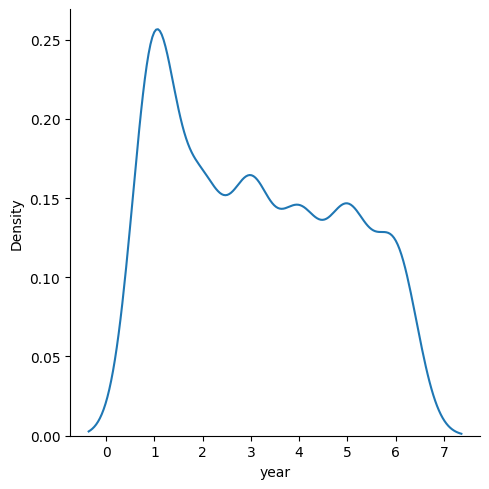

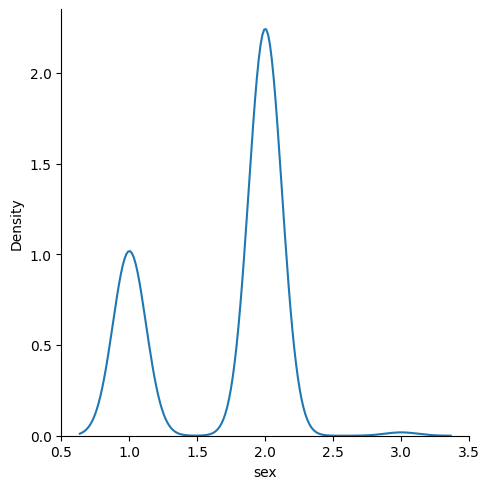

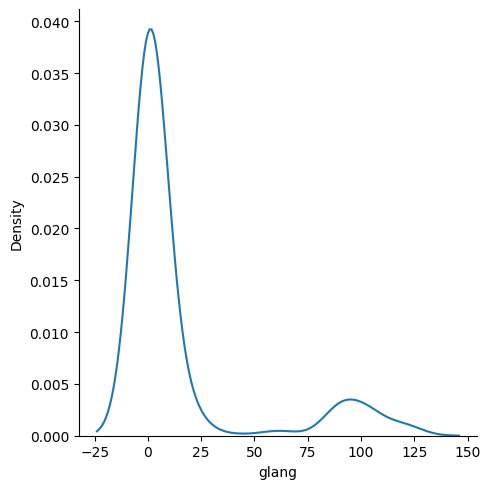

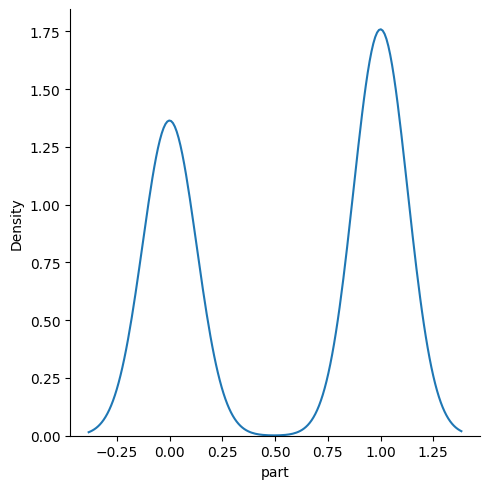

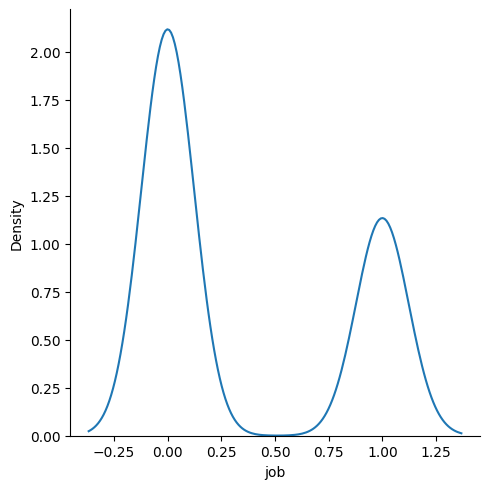

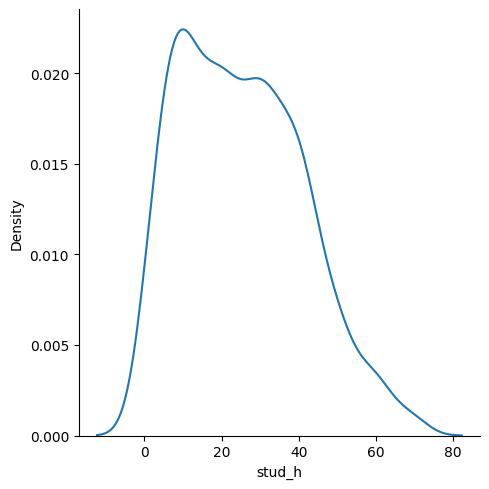

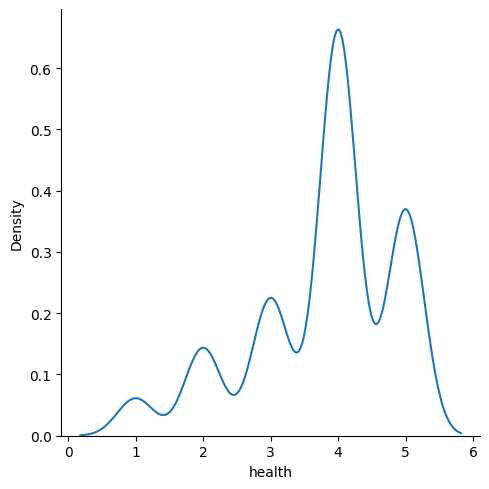

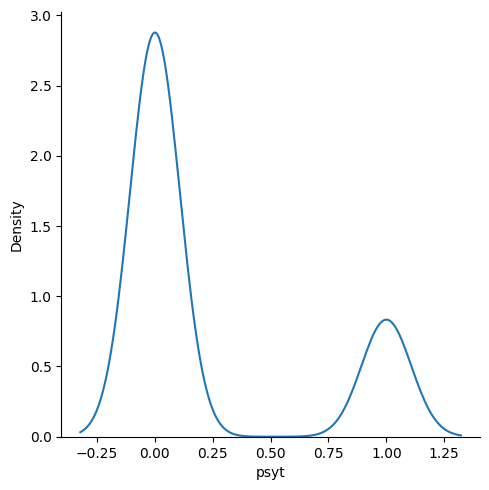

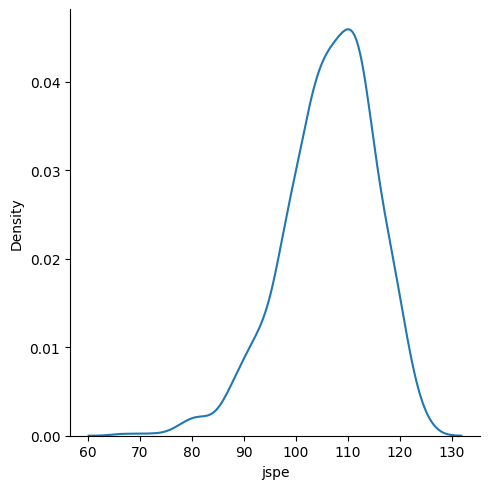

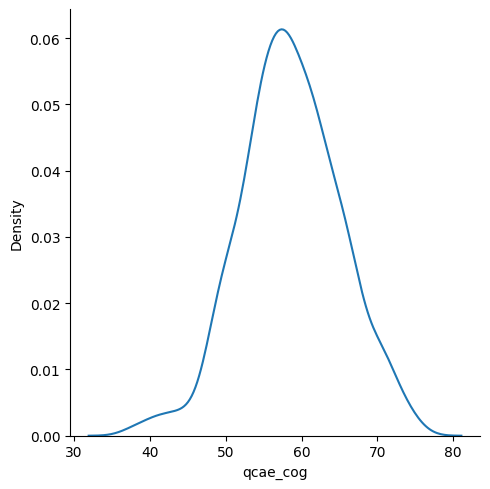

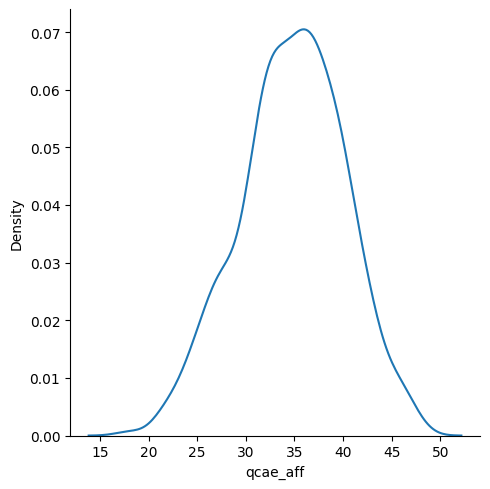

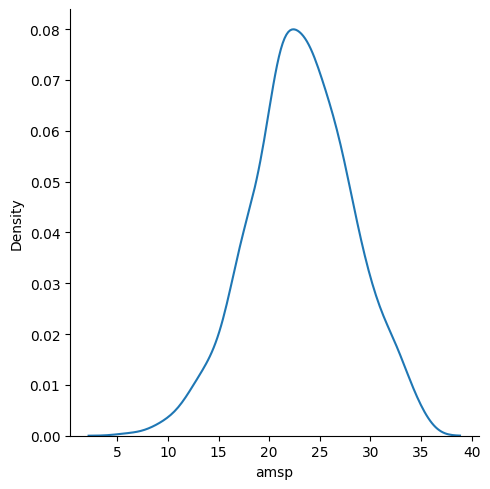

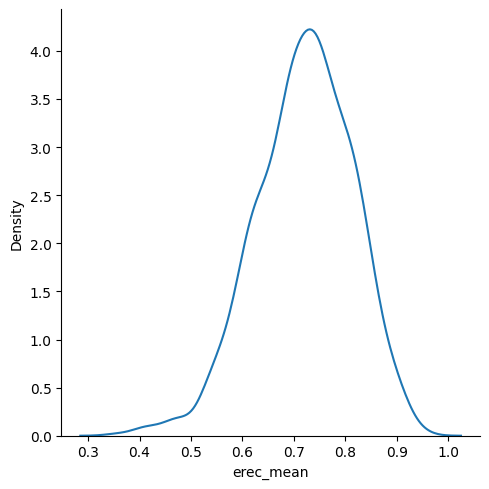

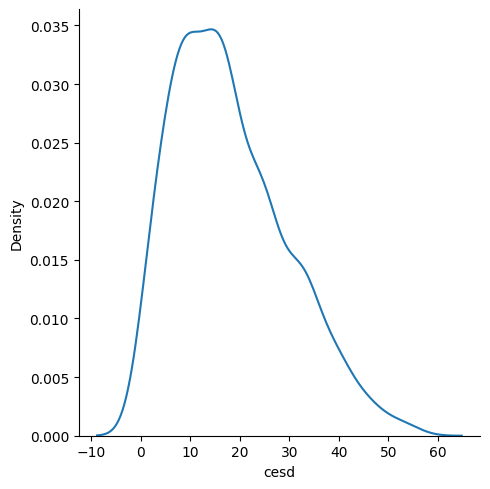

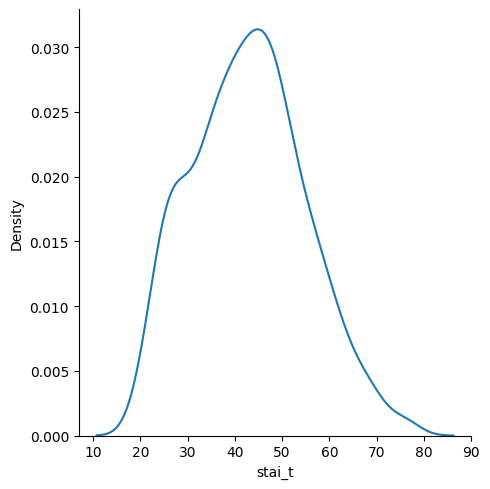

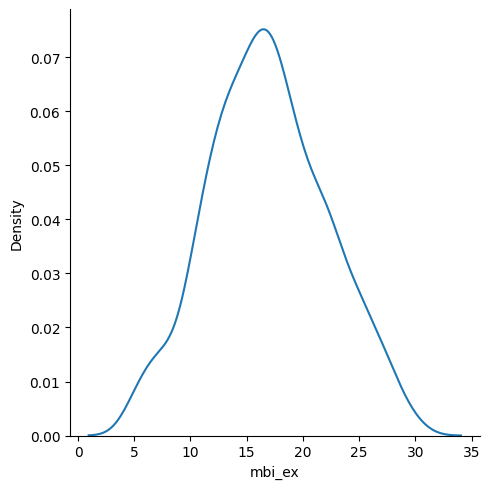

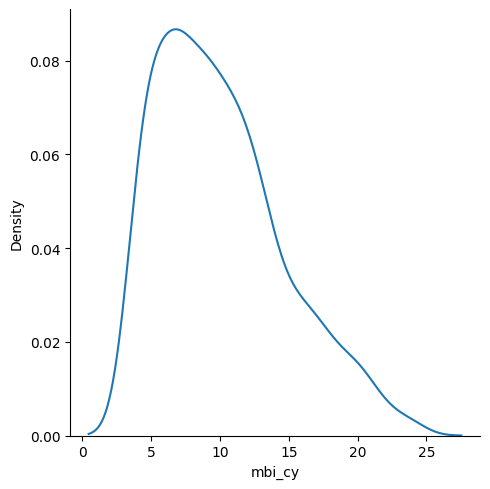

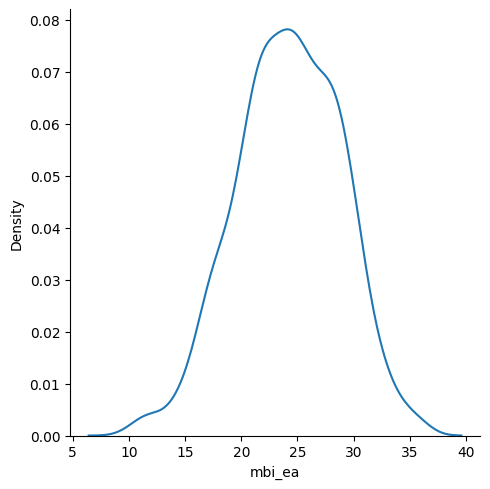

In [8]:
for col in df2.columns:
    sns.displot(data=df2, x=col, kind = 'kde')

#### Inspection result
* age distribution, jspe, mbi_ea, erec_mean, amsp, qcae_aff, qcae_cog is skewed to the right
* glang, health distribution, mbi_cy is skewed to the left

In [9]:
len(df2)

886

In [10]:
#We are planning to remove the outliers from the result of the survey listed in the column below
df3 = df2.copy()
outlier_col_to_remove = ['jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_cy', 'mbi_ea']
for col in outlier_col_to_remove:
    q1 = df3[col].quantile(0.25)
    q3 = df3[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    condition = (df3[col] >= lower_bound) & (df3[col] <= upper_bound)
    df3 = df3[condition]

In [11]:
df3[df3['qcae_aff'] == 18]

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea


In [12]:
df3[df3['mbi_ea'] == 10]

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea


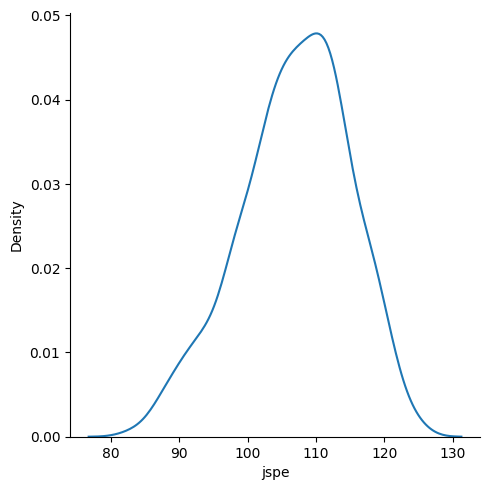

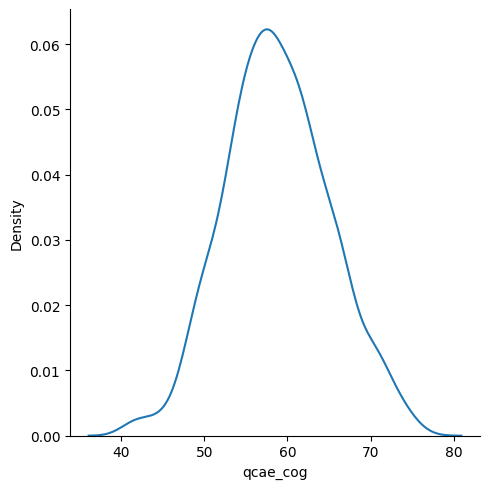

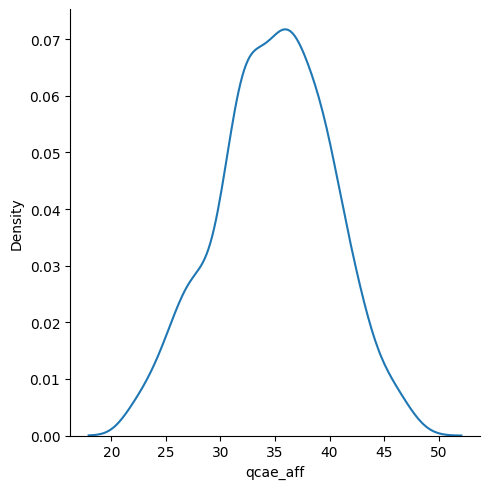

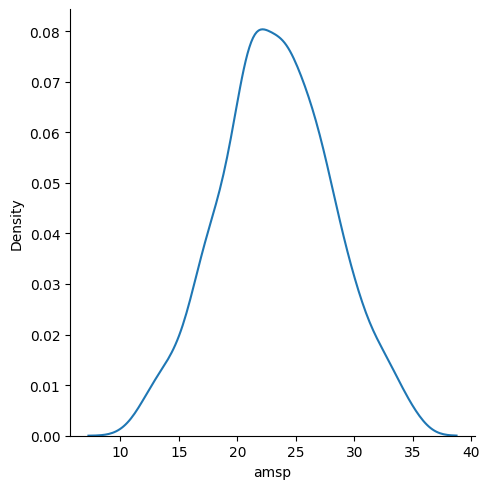

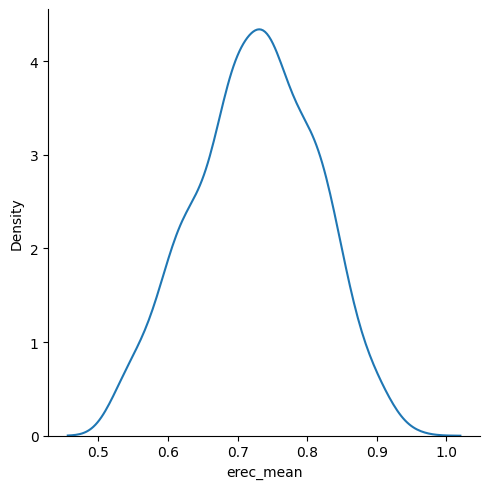

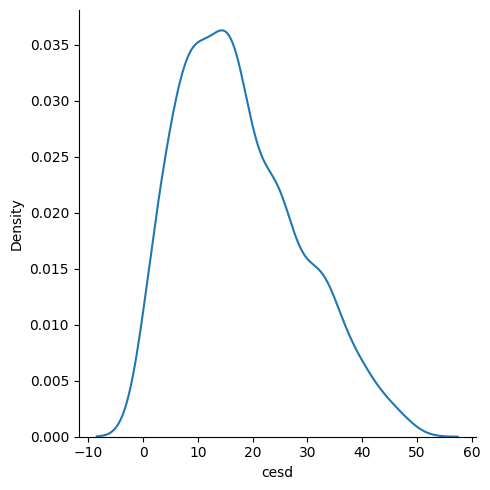

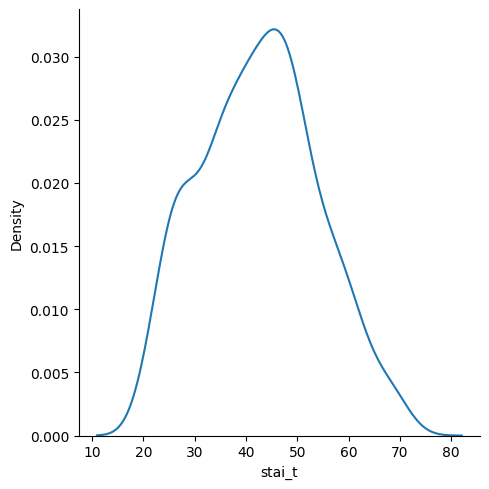

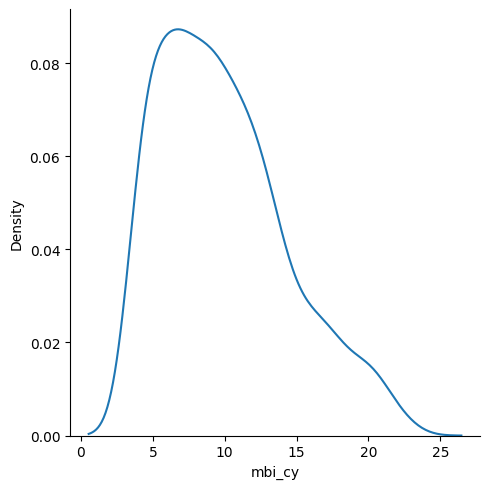

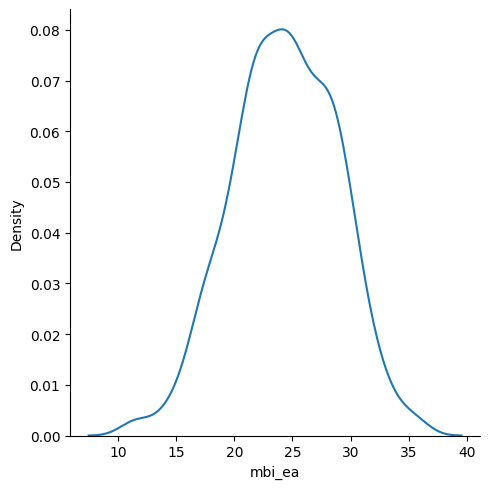

In [13]:
outlier_col_to_remove = ['jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_cy', 'mbi_ea']
for col in df3[outlier_col_to_remove]:
    sns.displot(data=df3, x=col, kind = 'kde')

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

def corr_matrix_with_p_values(df):
    fig, ax = plt.subplots(figsize=(11,11))
    correlation_matrix = df.corr().round(2)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    filtered_correlation_matrix = correlation_matrix.applymap(lambda x: x if 0.30 <= abs(x) <= 0.70 else np.nan)
    correlation_matrix_2  = sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", vmax=1, vmin=-1, center = 0, mask=mask, ax = ax)
    plt.show()
    plt.tight_layout()
    p_value_matrix = pd.DataFrame()
    significance_levels = [0.05, 0.01, 0.001]
    for col1 in correlation_matrix.columns:
        for col2 in correlation_matrix.columns:
            if col1 != col2:
                r, p = pearsonr(df[col1], df[col2])
                p_value = ''.join(['*' for alpha in significance_levels if p <= alpha])
                p_value_matrix.loc[col1, col2] = p_value
    corr_matrix_with_p_values = correlation_matrix.astype('str') + p_value_matrix.fillna('')
    return corr_matrix_with_p_values

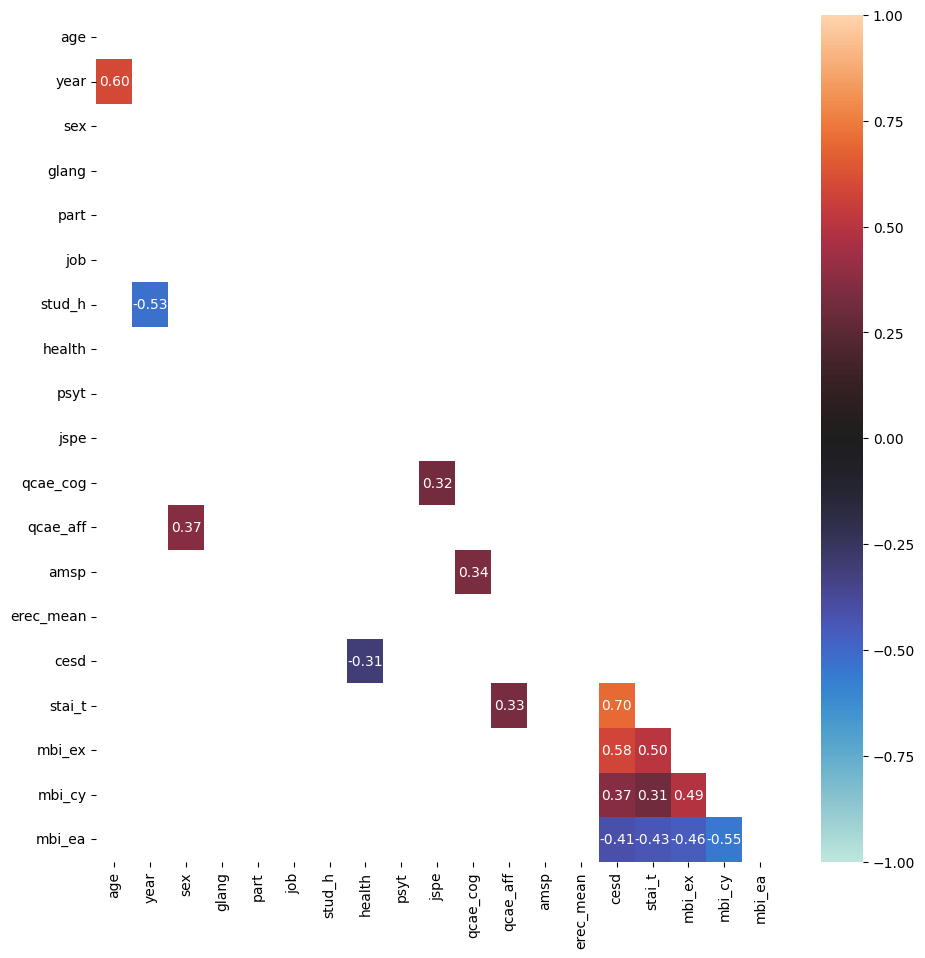

,age,amsp,cesd,erec_mean,glang,health,job,jspe,mbi_cy,mbi_ea,mbi_ex,part,psyt,qcae_aff,qcae_cog,sex,stai_t,stud_h,year
age,1.0,-0.03,-0.12***,0.02,0.01,-0.04,0.21***,0.22***,0.01,0.02,-0.16***,0.18***,0.04,-0.01,0.05,-0.08*,-0.06,-0.29***,0.6***
year,0.6***,-0.04,-0.23***,0.1**,-0.12***,0.07*,0.21***,0.29***,0.09**,-0.03,-0.22***,0.14***,0.02,0.07*,0.07*,-0.05,-0.14***,-0.53***,1.0
sex,-0.08*,-0.13***,0.24***,0.19***,-0.0,-0.08*,0.03,0.11**,0.02,-0.05,0.16***,-0.01,0.16***,0.37***,0.11**,1.0,0.26***,-0.01,-0.05
glang,0.01,-0.02,0.09**,-0.09**,1.0,-0.01,-0.06,-0.1**,0.02,0.01,0.06,-0.07*,-0.03,-0.07*,-0.05,-0.0,0.08*,0.08*,-0.12***
part,0.18***,0.07*,-0.12***,0.04,-0.07*,0.07*,0.05,0.1**,-0.03,0.06,-0.02,1.0,0.02,-0.01,0.03,-0.01,-0.08*,-0.1**,0.14***
job,0.21***,0.03,-0.06,0.05,-0.06,-0.03,1.0,0.08*,0.01,-0.03,-0.06,0.05,0.08*,-0.0,0.01,0.03,-0.06,-0.2***,0.21***
stud_h,-0.29***,0.0,0.19***,-0.06,0.08*,-0.08*,-0.2***,-0.15***,-0.08*,0.12***,0.19***,-0.1**,-0.03,-0.03,-0.03,-0.01,0.15***,1.0,-0.53***
health,-0.04,0.02,-0.31***,0.02,-0.01,1.0,-0.03,-0.01,-0.16***,0.18***,-0.26***,0.07*,-0.13***,-0.05,-0.05,-0.08*,-0.28***,-0.08*,0.07*
psyt,0.04,-0.07*,0.27***,-0.01,-0.03,-0.13***,0.08*,0.05,0.16***,-0.17***,0.17***,0.02,1.0,0.1**,0.05,0.16***,0.29***,-0.03,0.02
jspe,0.22***,0.09*,-0.06,0.1**,-0.1**,-0.01,0.08*,1.0,0.0,0.07*,-0.02,0.1**,0.05,0.23***,0.32***,0.11**,-0.07*,-0.15***,0.29***


<Figure size 640x480 with 0 Axes>

In [15]:
correlation_matrix_final = corr_matrix_with_p_values(df3)
correlation_matrix_final

Dataset: https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health/data

Exploratory Data Analysis
* Descriptive Analysis

In [16]:
df2.describe()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,3.102709,1.695260,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,3.300664,1.763937,0.472665,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,49.000000,6.000000,3.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


#Question 1: Which gender experiences the most anxiety?

- Exploring stai_t vs gender

STAI_T
* (20-37): 'No or low anxiety'
* (38-44): 'Moderate anxiety'
* (45-80): 'High anxiety'


Reference: doi: 10.1159/000478993

In [17]:
df4 = df3.loc[:, ['sex', 'stai_t']]

import numpy as np

def assigning_anxiety_scores(x):
  if x > 80:
    return np.nan
  elif 45 <= x <= 80:
    return 'High anxiety'
  elif 38 <= x <= 44:
    return 'Moderate anxiety'
  else:
    return 'No or low anxiety'

df4['anxiety_levels'] = df4['stai_t'].map(lambda x: assigning_anxiety_scores(x))

In [18]:
def assign_gender(x):
  if x == 1:
    return 'Man'
  elif x == 2:
    return 'Woman'
  else:
    return 'Non-binary'

df4['gender'] = df4['sex'].map(lambda x: assign_gender(x))

In [19]:
df4['anxiety_levels'].value_counts()

High anxiety         369
No or low anxiety    288
Moderate anxiety     173
Name: anxiety_levels, dtype: int64

In [20]:
df4['gender'].value_counts()

Woman         575
Man           250
Non-binary      5
Name: gender, dtype: int64

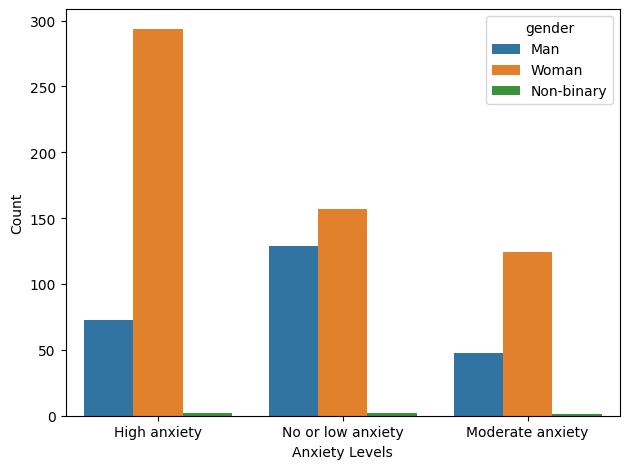

In [21]:
sns.countplot(data=df4, x='anxiety_levels', hue='gender')
plt.tight_layout()
plt.xlabel('Anxiety Levels')
plt.ylabel('Count')
plt.show()


#Question 2

Which student year is experiencing the most burnout?

* Exploring between year and burnout metrics - mbi_ex,
mbi_cy

What version of mbi_ex was used?

General scoring for mbi_ex:
* Higher than 16 (Burnout)

General scoring for mbi_cy:
* Higher than 11 (Burnout)

General scoring for mbi_pe:
* 23 or lower (Burnout)


doi: 10.1186/s12909-020-02134-0

<ipython-input-22-5370b282ce89>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['student'] = df5['year'].map(lambda x: student_year(x))


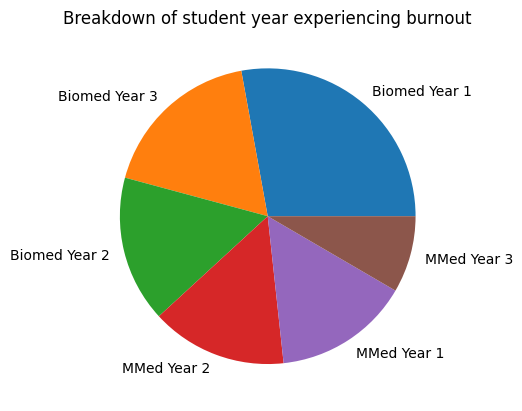

In [22]:
df5 = df3.loc[:, ['year', 'mbi_ex', 'mbi_cy']]

df6 = df5.loc[(df5['mbi_ex'] >= 16) & (df5['mbi_cy'] >= 11)]
df6

def student_year(x):
  if x == 1:
    return 'Biomed Year 1'
  elif x == 2:
    return 'Biomed Year 2'
  elif x == 3:
    return 'Biomed Year 3'
  elif x == 4:
    return 'MMed Year 1'
  elif x == 5:
    return 'MMed Year 2'
  else:
    return 'MMed Year 3'

df6['student'] = df5['year'].map(lambda x: student_year(x))
df6['student'].isna().sum()
year_value_counts = df6['student'].value_counts()
plt.pie(year_value_counts, labels = year_value_counts.index)
plt.title('Breakdown of student year experiencing burnout')
plt.show()

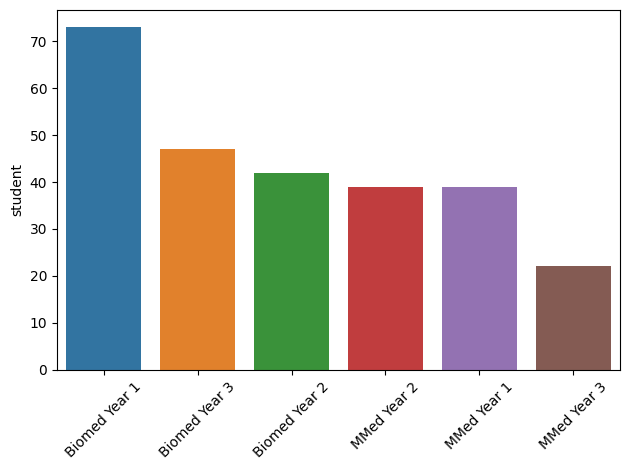

In [23]:
sns.barplot(df6, x=year_value_counts.index, y=year_value_counts)
plt.xticks(rotation=45)
plt.tight_layout()

#Question 3

How many student who is having a job and consulted with psychotherapy?

#plot no job + psychotherapy vs job with psychotherapy

* Who is having a job - 1
* Who went to psychotherapy - 1

<Axes: xlabel='job', ylabel='psyt'>

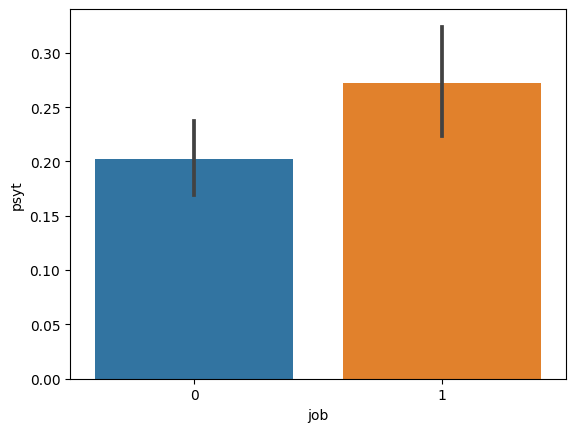

In [24]:
df7 = df3.loc[:, ['job', 'psyt']]

sns.barplot(data=df7, x='job', y='psyt') #try

#Question 4

Are the students satisfied with their health? Which year is the most dissatisfied with their health?

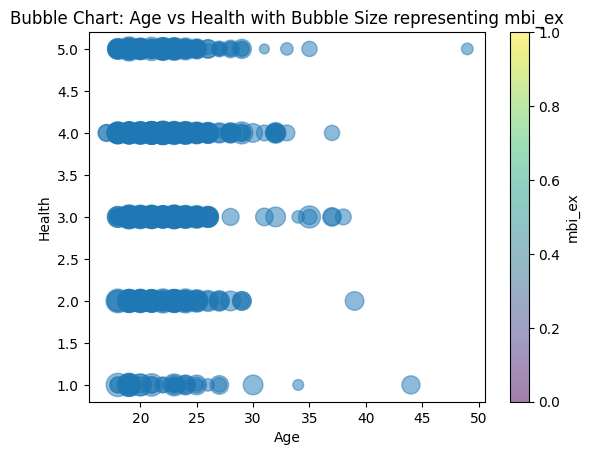

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df2['age'], df2['health'], s=df2['mbi_ex']*10, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Health')
plt.title(f'Bubble Chart: Age vs Health with Bubble Size representing mbi_ex')
cbar = plt.colorbar()
cbar.set_label('mbi_ex')
plt.show()


#Larger bublles indicate higher mbi_ex

#Confirmatory Data Analysis

#Question 4

Is there a relationship between qcae_aff and sex?

* H0: There is no relationship between sex and qcae_aff
* H1: There is a relationship between sex and qcae_aff

In [26]:
#z-test
from scipy.stats import ttest_ind

data_male = df2[df2['sex'] == 1]['qcae_aff']
data_female = df2[df2['sex'] == 2]['qcae_aff']

t_stat, p_value = ttest_ind(data_male, data_female)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (means are different)")
else:
    print("Fail to reject the null hypothesis (means are the same)")

T-statistic: -11.362245358967686
P-value: 5.1996063378598425e-28
Reject the null hypothesis (means are different)


#Question 5 ANOVA



In [27]:
from scipy.stats import f_oneway

for variable in ['stud_h', 'erec_mean', 'amsp']:
    anova_result = f_oneway(df[variable][df['sex'] == 1], df[variable][df['sex'] == 2])

    print(f"ANOVA Results for {variable}:")
    print("F-statistic:", anova_result.statistic)
    print("P-value:", anova_result.pvalue)

    alpha = 0.05
    if anova_result.pvalue < alpha:
        print("Reject the null hypothesis (significant differences exist)")
    else:
        print("Fail to reject the null hypothesis (no significant differences)")
    print("\n")


ANOVA Results for stud_h:
F-statistic: 0.0006756454353700824
P-value: 0.9792686775163761
Fail to reject the null hypothesis (no significant differences)


ANOVA Results for erec_mean:
F-statistic: 40.61276746665713
P-value: 2.991758723487583e-10
Reject the null hypothesis (significant differences exist)


ANOVA Results for amsp:
F-statistic: 16.312196605425523
P-value: 5.8410283245677406e-05
Reject the null hypothesis (significant differences exist)




#Result of ANOVA

* 'stud_h' variable does not appear to differ significantly between males and females.
* 'erec_mean' variable seems to vary significantly between males and females.
* There are significant differences in 'amsp' means between the two groups.

#Check for class imbalance

General scoring for mbi_ex:
* Higher than 16 (Burnout)

General scoring for mbi_cy:
* Higher than 11 (Burnout)

General scoring for mbi_pe:
* 23 or lower (Burnout)


doi: 10.1186/s12909-020-02134-0

In [28]:
df4 = df2.copy()

def decode_mbi_ex(x):
  if x >= 16:
    return 'Burnout'
  else:
    return 'Not Burnout'

def decode_mbi_cy(x):
  if x >= 11:
    return 'Burnout'
  else:
    return 'Not Burnout'

def decode_mbi_ea(x):
  if x > 23:
    return 'No Burnout'
  else:
    return 'Burnout'


df4['decode_mbi_ex'] = df2['mbi_ex'].map(lambda x: decode_mbi_ex(x))
df4['decode_mbi_cy'] = df2['mbi_cy'].map(lambda x: decode_mbi_cy(x))
df4['decode_mbi_ea'] = df2['mbi_ea'].map(lambda x: decode_mbi_ea(x))


In [29]:
class_distribution = df4['decode_mbi_ex'].value_counts()
minority_class = class_distribution.idxmin()
majority_class = class_distribution.idxmax()
imbalance_ratio = class_distribution[minority_class] / class_distribution[majority_class]
print(f"Imbalance ratio is {imbalance_ratio}")

Imbalance ratio is 0.6844106463878327


<Axes: xlabel='decode_mbi_ex', ylabel='count'>

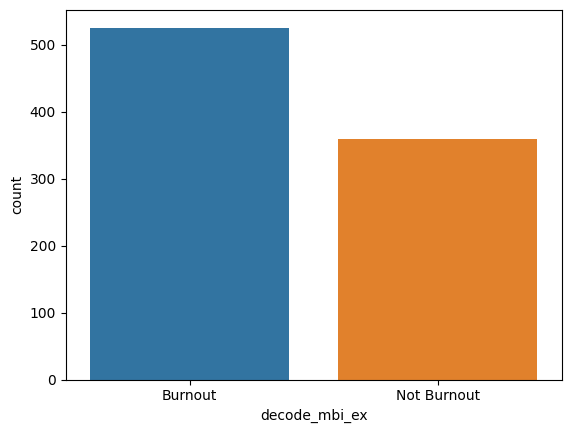

In [30]:
sns.countplot(df4, x=df4['decode_mbi_ex'])

In [31]:
class_distribution = df4['decode_mbi_cy'].value_counts()
minority_class = class_distribution.idxmin()
majority_class = class_distribution.idxmax()
imbalance_ratio = class_distribution[minority_class] / class_distribution[majority_class]
print(f"Imbalance ratio is {imbalance_ratio}")

Imbalance ratio is 0.6973180076628352


<Axes: xlabel='decode_mbi_cy', ylabel='count'>

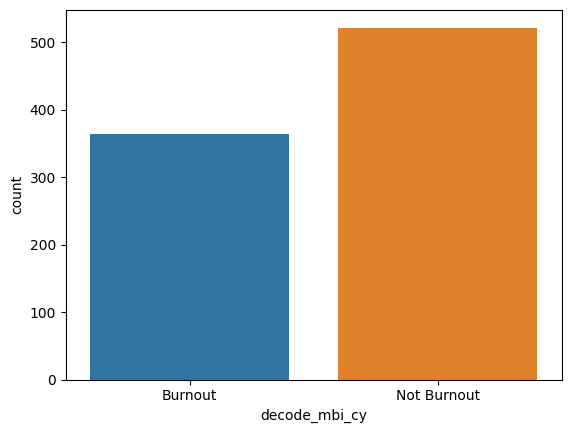

In [32]:
sns.countplot(df4, x=df4['decode_mbi_cy'])

In [33]:
class_distribution = df4['decode_mbi_ea'].value_counts()
minority_class = class_distribution.idxmin()
majority_class = class_distribution.idxmax()
imbalance_ratio = class_distribution[minority_class] / class_distribution[majority_class]
print(f"Imbalance ratio is {imbalance_ratio}")

Imbalance ratio is 0.7614314115308151


<Axes: xlabel='decode_mbi_ea', ylabel='count'>

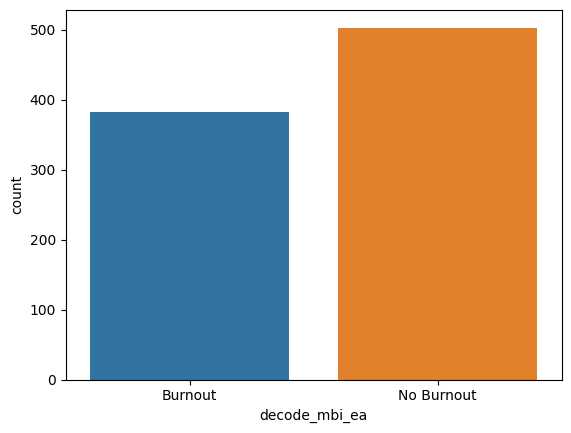

In [34]:
sns.countplot(df4, x=df4['decode_mbi_ea'])

#### Since there are class imbalances, we may need to balance the classes using SMOTE

#Feature Engineering

In [35]:
def find_correlated_columns(df, threshold):
    correlated_columns = set()
    corr_matrix = df.corr()

    for column in corr_matrix.columns:
        correlated_cols = corr_matrix[corr_matrix[column] > threshold].index.tolist()
        correlated_columns.update(correlated_cols)

    return correlated_columns

In [36]:
corr_features = find_correlated_columns(df2, 0.7)
len(set(corr_features))

19

#### We are trying to predict mbi_ex, mbi_cy,mbi_ea. Hence, we are using Random Forest Classifier to obtain feature importance scores

In [37]:
#For mbi_ex
from sklearn.ensemble import RandomForestClassifier

X = df2.drop('mbi_ex', axis=1)
y = df2['mbi_ex']
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame(list(zip(X.columns, feature_importances)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)



      Feature  Importance
14       cesd    0.089342
15     stai_t    0.081868
9        jspe    0.077659
6      stud_h    0.075954
10   qcae_cog    0.075932
11   qcae_aff    0.074130
12       amsp    0.073166
17     mbi_ea    0.071939
16     mbi_cy    0.071204
13  erec_mean    0.068145
0         age    0.061191
1        year    0.046037
7      health    0.036667
3       glang    0.022567
4        part    0.021392
5         job    0.018815
2         sex    0.018615
8        psyt    0.015378


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df4['decode_mbi_ex'] = label_encoder.fit_transform(df4['decode_mbi_ex'])
df4['decode_mbi_cy'] = label_encoder.fit_transform(df4['decode_mbi_cy'])
df4['decode_mbi_ea'] = label_encoder.fit_transform(df4['decode_mbi_ea'])

In [39]:
df4.columns

Index(['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health',
       'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd',
       'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea', 'decode_mbi_ex',
       'decode_mbi_cy', 'decode_mbi_ea'],
      dtype='object')

In [40]:
df5 = df4.drop(columns=['mbi_ex', 'mbi_cy', 'mbi_ea', ])

In [130]:
#Prediction for mbi_ex

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

X = df5.drop('decode_mbi_ex', axis=1)
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)




In [120]:
def logistic_regression(X_train, y_train, X_test, y_test):
    pipeline_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('lr', LogisticRegression())
    ])

    param_grid_lr = {
        'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'lr__penalty': ['l1', 'l2']
    }

    grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
    grid_search_lr.fit(X_train, y_train)

    best_params_lr = grid_search_lr.best_params_
    print("Best Parameters:", best_params_lr)

    y_pred_lr = grid_search_lr.predict(X_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)

    print(f"Mean Squared Error (Logistic Regression with HPT): {mse_lr:.3f}")
    print(f"RMSE: {rmse_lr:.3f}")
    print(f"R2: {r2_lr: .3f}")

    return best_params_lr, r2_lr, mse_lr, rmse_lr


In [122]:
def support_vector_machine(X_train, y_train, X_test, y_test):
    pipeline_svc = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('svc', SVC())
    ])

    param_grid_svc = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
    }

    grid_search_svm = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy')
    grid_search_svm.fit(X_train, y_train)

    best_params_svm = grid_search_svm.best_params_
    print("Best Parameters:", best_params_svm)

    y_pred_svm = grid_search_svm.predict(X_test)
    r2_svm = r2_score(y_test, y_pred_svm)
    mse_svm = mean_squared_error(y_test, y_pred_svm)
    rmse_svm = np.sqrt(mse_svm)

    print(f"Mean Squared Error (SVM with HPT): {mse_svm:.3f}")
    print(f"RMSE: {rmse_svm:.3f}")
    print(f"R2: {r2_svm: .3f}")

    return best_params_svm, r2_svm, mse_svm, rmse_svm

In [126]:
def decision_tree(X_train, y_train, X_test, y_test):
    pipeline_dt = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('dt', DecisionTreeClassifier())
    ])

    param_grid_dt = {
        'dt__max_depth': [None, 5, 10, 15],
        'dt__min_samples_split': [2, 5, 10]
    }

    grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
    grid_search_dt.fit(X_train, y_train)

    best_params_dt = grid_search_dt.best_params_
    print("Best Parameters:", best_params_dt)

    y_pred_dt = grid_search_dt.predict(X_test)
    r2_dt = r2_score(y_test, y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    rmse_dt = np.sqrt(mse_dt)

    print(f"Mean Squared Error (Decision Tree with HPT): {mse_dt:.3f}")
    print(f"RMSE: {rmse_dt:.3f}")
    print(f"R2: {r2_dt: .3f}")

    return best_params_dt, r2_dt, mse_dt, rmse_dt


In [136]:
def gradient_boosting(X_train, y_train, X_test, y_test):
    pipeline_gb = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('gb', GradientBoostingClassifier())
    ])

    param_grid_gb = {
        'gb__n_estimators': [50, 100, 200],
        'gb__learning_rate': [0.01, 0.1, 0.2],
        'gb__max_depth': [3, 5, 7]
    }

    grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=3, scoring='accuracy')
    grid_search_gb.fit(X_train, y_train)

    best_params_gb = grid_search_gb.best_params_
    print("Best Parameters:", best_params_gb)

    y_pred_gb = grid_search_gb.predict(X_test)
    r2_gb = r2_score(y_test, y_pred_gb)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    rmse_gb = np.sqrt(mse_gb)

    print(f"Mean Squared Error (Gradient Boosting with HPT): {mse_gb:.3f}")
    print(f"RMSE: {rmse_gb:.3f}")
    print(f"R2: {r2_gb: .3f}")

    return best_params_gb, r2_gb, mse_gb, rmse_gb


In [138]:
def k_nearest_neighbors(X_train, y_train, X_test, y_test):
    pipeline_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('knn', KNeighborsClassifier())
    ])

    param_grid_knn = {
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance']
    }

    grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
    grid_search_knn.fit(X_train, y_train)

    best_params_knn = grid_search_knn.best_params_
    print("Best Parameters:", best_params_knn)

    y_pred_knn = grid_search_knn.predict(X_test)
    r2_knn = r2_score(y_test, y_pred_knn)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)

    print(f"Mean Squared Error (KNN with HPT): {mse_knn:.3f}")
    print(f"RMSE: {rmse_knn:.3f}")
    print(f"R2: {r2_knn: .3f}")

    return best_params_knn, r2_knn, mse_knn, rmse_knn





In [141]:
def naive_bayes(X_train, y_train, X_test, y_test):
    pipeline_nb = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('nb', GaussianNB())
    ])

    param_grid_nb = {
        'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }

    grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='accuracy')
    grid_search_nb.fit(X_train, y_train)

    best_params_nb = grid_search_nb.best_params_
    print("Best Parameters:", best_params_nb)

    y_pred_nb = grid_search_nb.predict(X_test)
    r2_nb = r2_score(y_test, y_pred_nb)
    mse_nb = mean_squared_error(y_test, y_pred_nb)
    rmse_nb = np.sqrt(mse_nb)

    print(f"Mean Squared Error (Naive Bayes with HPT): {mse_nb:.3f}")
    print(f"RMSE: {rmse_nb:.3f}")
    print(f"R2: {r2_nb: .3f}")

    return best_params_nb, r2_nb, mse_nb, rmse_nb


In [148]:
def random_forest(X_train, y_train, X_test, y_test):

  pipeline_rf = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('rf', RandomForestClassifier())
    ])
  param_grid_rf = {
        'rf__n_estimators': [50, 100, 200],
        'rf__max_depth': [None, 5, 10],
        'rf__min_samples_split': [2, 5, 10]
    }

  grid_search_rf  = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
  grid_search_rf.fit(X_train, y_train)

  best_params_rf = grid_search_rf.best_params_
  print("Best Parameters:", best_params_rf)

  y_pred_rf = grid_search_rf.predict(X_test)
  r2_rf = r2_score(y_test, y_pred_rf)
  mse_rf = mean_squared_error(y_test, y_pred_rf)
  rmse_rf = np.sqrt(mse_rf)

  print(f"Mean Squared Error (Random Forest with HPT): {mse_rf:.3f}")
  print(f"RMSE: {rmse_rf:.3f}")
  print(f"R2: {r2_rf: .3f}")

  return best_params_rf, r2_rf, mse_rf, rmse_rf

In [149]:
def neural_network(X_train, y_train, X_test, y_test):
  pipeline_nn = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('nn', MLPClassifier(max_iter=500))
    ])

  param_grid_nn = {
        'nn__hidden_layer_sizes': [(50, 25), (100,), (100, 50)],
        'nn__alpha': [0.0001, 0.001, 0.01],
    }

  grid_search_nn = GridSearchCV(pipeline_nn, param_grid_nn, cv=3, scoring='accuracy')
  grid_search_nn.fit(X_train, y_train)

  best_params_nn = grid_search_nn.best_params_
  print("Best Parameters:", best_params_nn)

  y_pred_nn = grid_search_nn.predict(X_test)
  r2_nn = r2_score(y_test, y_pred_nn)
  mse_nn = mean_squared_error(y_test, y_pred_nn)
  rmse_nn = np.sqrt(mse_nn)

  print(f"Mean Squared Error (Neural Networks with HPT): {mse_nn:.3f}")
  print(f"RMSE: {rmse_nn:.3f}")
  print(f"R2: {r2_nn: .3f}")

  return best_params_nn, r2_nn, mse_nn, rmse_nn


In [131]:
import warnings
warnings.filterwarnings("ignore")
logistic_regression(X_train, y_train, X_test, y_test)

Best Parameters: {'lr__C': 100, 'lr__penalty': 'l2'}
Mean Squared Error (Logistic Regression with HPT): 24.096
RMSE: 4.909
R2:  0.577


({'lr__C': 100, 'lr__penalty': 'l2'},
 0.5774008372838608,
 24.096103896103894,
 4.908778248821584)

In [132]:
support_vector_machine(X_train, y_train, X_test, y_test)

Best Parameters: {'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Mean Squared Error (SVM with HPT): 12.919
RMSE: 3.594
R2:  0.773


({'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'},
 0.7734172431443272,
 12.91948051948052,
 3.59436788872265)

In [133]:
decision_tree(X_train, y_train, X_test, y_test)

Best Parameters: {'dt__max_depth': 15, 'dt__min_samples_split': 2}
Mean Squared Error (Decision Tree with HPT): 21.779
RMSE: 4.667
R2:  0.618


({'dt__max_depth': 15, 'dt__min_samples_split': 2},
 0.618034496132928,
 21.77922077922078,
 4.666821271403135)

In [139]:
k_nearest_neighbors(X_train, y_train, X_test, y_test)

Best Parameters: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Mean Squared Error (KNN with HPT): 16.545
RMSE: 4.068
R2:  0.710


({'knn__n_neighbors': 3, 'knn__weights': 'distance'},
 0.709824655976953,
 16.545454545454547,
 4.067610422035836)

In [144]:
naive_bayes(X_train, y_train, X_test, y_test)

Best Parameters: {'nb__var_smoothing': 1e-09}
Mean Squared Error (Naive Bayes with HPT): 23.106
RMSE: 4.807
R2:  0.595


({'nb__var_smoothing': 1e-09},
 0.5947566938102,
 23.106493506493507,
 4.806921416717097)

In [150]:
random_forest(X_train, y_train, X_test, y_test)

Best Parameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Mean Squared Error (Random Forest with HPT): 12.081
RMSE: 3.476
R2:  0.788


({'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200},
 0.788131000776893,
 12.08051948051948,
 3.475704170455173)

In [151]:
#warnings.resetwarnings()
gradient_boosting(X_train, y_train, X_test, y_test)

KeyboardInterrupt: ignored